# Example of use of tclust

This is a short example of use of the scikit-learn-compatible tclust package.

In [1]:
# Import needed libraries
from tclust import TClust  # import our package
# Some other imports
import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs

## Test with sklearn's blobs

In [3]:
n_centers = 3
x, y = make_blobs(n_samples=1500, n_features=2, centers=n_centers, random_state=170)
print(x.shape)  # 1500 samples with 2 features each (just so we can plot them)

# run tclust without trimming (because we're not adding noise to the blobs)
clustering = TClust(k=n_centers, alpha=0, verbose=False)  
t0 = time.clock()
clustering.fit(x)
print('Time spent on training = %.2f s' % (time.clock() - t0))
#print("y.set", set(y), 'labels set', set(clustering.best_iter.labels_))
print("Confusion matrix:")
print(confusion_matrix(y, clustering.best_iter.labels_))

(1500, 2)
Creating Iteration object with nobs=1500, ndim=2, k=3
p=2, restr_cov_value=eigen, f_restr=restr_diffax, restr_deter=False
runtime warning avoided!
Time spent on training = 1.31 s
Confusion matrix:
[[  0 500   0   0]
 [  0   0   0 500]
 [  0   0 500   0]
 [  0   0   0   0]]


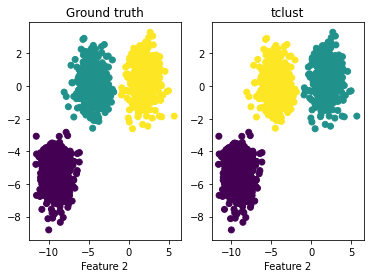

In [5]:
# Plot ground truth (left) and result from tclust (right)
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.title('Ground truth')
plt.subplot(1, 2, 2)
plt.scatter(x[:, 0], x[:, 1], c=clustering.best_iter.labels_)
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.title('tclust')
plt.show()

## Examples from the original tclust package

In [6]:
# Initialization (this is common for the next two examples)
nsamp = 200
nfeat = 2
gauss = np.random.randn
u = gauss(nsamp * nfeat).reshape(nsamp, nfeat)  # standard normal distribution
v = np.cov(u.T)
eig_values, eig_vectors = np.linalg.eig(v)

### Example 1

In [7]:
# We create 3 clusters + noise
x1 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[1, 0], [0, 9]])).dot(eig_vectors) + \
     repmat(np.array([20, 20]).reshape(1, -1), nsamp, 1)
x2 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[9, 0], [0, 1]])).dot(eig_vectors) + \
     repmat(np.array([-20, -20]).reshape(1, -1), nsamp, 1)
x3 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[3, 0], [0, 3]])).dot(eig_vectors) + \
     repmat(np.array([0, 0]).reshape(1, -1), nsamp, 1)
x4 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[25, 0], [0, 25]])).dot(eig_vectors) + \
     repmat(np.array([2, 3]).reshape(1, -1), nsamp, 1)
x = np.concatenate((x1, x2, x3, x4), axis=0)  # shape=[800, 2]

label = [1] * nsamp + [2] * nsamp + [3] * nsamp + [4] * nsamp

In [9]:
clustering = TClust(k=3, alpha=0.25, n_inits=200, ksteps=40, equal_weights=False, restr_cov_value='deter',
                    maxfact_e=1e10, maxfact_d=10, m=1.1, zero_tol=1e-16, trace=0, opt='mixture', sol_ini=None,
                    tk=False, verbose=True)
t0 = time.clock()
clustering.fit(x)
print('Time spent on training = %.2f s' % (time.clock() - t0))  
# Note this is much faster when run on the console (30-ish seconds), rather than on a notebook
print("Confusion matrix:")
print(confusion_matrix(label, clustering.best_iter.labels_))

Creating Iteration object with nobs=800, ndim=2, k=3
p=2, restr_cov_value=deter, f_restr=restr_diffax, restr_deter=False
(1/200) New iteration is better! Old obj: -inf; New obj: -3622.68
(2/200) New iteration is better! Old obj: -3622.68; New obj: -3621.88
Initialisation = 50/200
Initialisation = 100/200
Initialisation = 150/200
Initialisation = 200/200
Time spent on training = 41.05 s
Confusion matrix:
[[  0   0   0   0   0]
 [  7   0 193   0   0]
 [  1 199   0   0   0]
 [ 10   0   0 190   0]
 [182   5   4   9   0]]


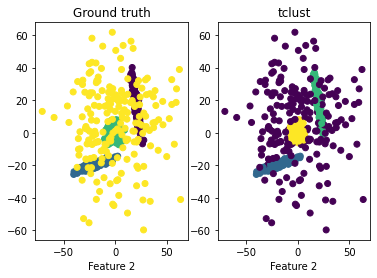

In [10]:
# Plot ground truth (left) and result from tclust (right)
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1], c=label)
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.title('Ground truth')
plt.subplot(1, 2, 2)
plt.scatter(x[:, 0], x[:, 1], c=clustering.best_iter.labels_)
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.title('tclust')
plt.show()

### Example 2: Fuzzy assignment

In [11]:
# Create 3 blobs + noise
y1 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[1, 0], [0, 1]])).dot(eig_vectors) + \
     repmat(np.array([2.5, 3]).reshape(1, -1), nsamp, 1)
y2 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[1, 0], [0, 1]])).dot(eig_vectors) + \
     repmat(np.array([-2.5, 3]).reshape(1, -1), nsamp, 1)
y3 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[1, 0], [0, 1]])).dot(eig_vectors) + \
     repmat(np.array([0, 0]).reshape(1, -1), nsamp, 1)
y4 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[8, 0], [0, 8]])).dot(eig_vectors) + \
     repmat(np.array([0, 2]).reshape(1, -1), nsamp, 1)
y = np.concatenate((y1, y2, y3, y4), axis=0)  # shape=[800, 2]

label = [1] * nsamp + [2] * nsamp + [3] * nsamp + [4] * nsamp

In [13]:
# Perform clustering with tclust
clustering = TClust(k=3, alpha=0.25, n_inits=200, ksteps=40, equal_weights=False, maxfact_d=10, m=1.1, 
                    zero_tol=1e-16, trace=0, opt='fuzzy', sol_ini=None, 
                    verbose=False)  # suppress output
t0 = time.clock()
clustering.fit(y)
print('Time spent on training = %.2f s' % (time.clock() - t0))
# Note this is much faster when run on the console (<30 seconds), rather than on a notebook
print("Confusion matrix")
print(confusion_matrix(label, clustering.best_iter.labels_))

Creating Iteration object with nobs=800, ndim=2, k=3
p=2, restr_cov_value=eigen, f_restr=restr_diffax, restr_deter=False
Time spent on training = 39.90 s
Confusion matrix
[[  0   0   0   0   0]
 [  8   5   1 186   0]
 [  4   5 191   0   0]
 [ 11 180   3   6   0]
 [177   6   9   8   0]]


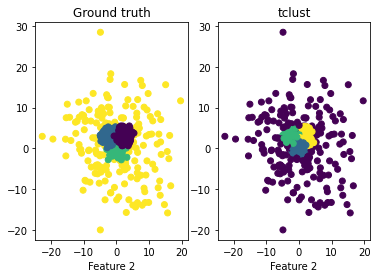

In [16]:
# Plot ground truth (left) and result from tclust (right)
plt.subplot(1, 2, 1)
plt.scatter(y[::-1, 0], y[::-1, 1], c=label[::-1])
# the ::-1 above is only so that the noise doesn't overwrite the clusters (otherwise they're hard to see in the plot)
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.title('Ground truth')
plt.subplot(1, 2, 2)
plt.scatter(y[:, 0], y[:, 1], c=clustering.best_iter.labels_)
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.title('tclust')
plt.show()